In [3]:
import sys
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import scipy
import sklearn

print("Scipy {}".format(scipy.__version__))

Scipy 1.2.1


In [4]:
# specific packages
import matplotlib.pyplot as plt

In [44]:
#load the datasets
data = pd.read_csv('creditcard.csv')

In [45]:
# exploring the dataset
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [46]:
data.shape

(284807, 31)

In [47]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [48]:
data = data.sample(frac =0.6, random_state = 1)
print(data.shape)

(170884, 31)


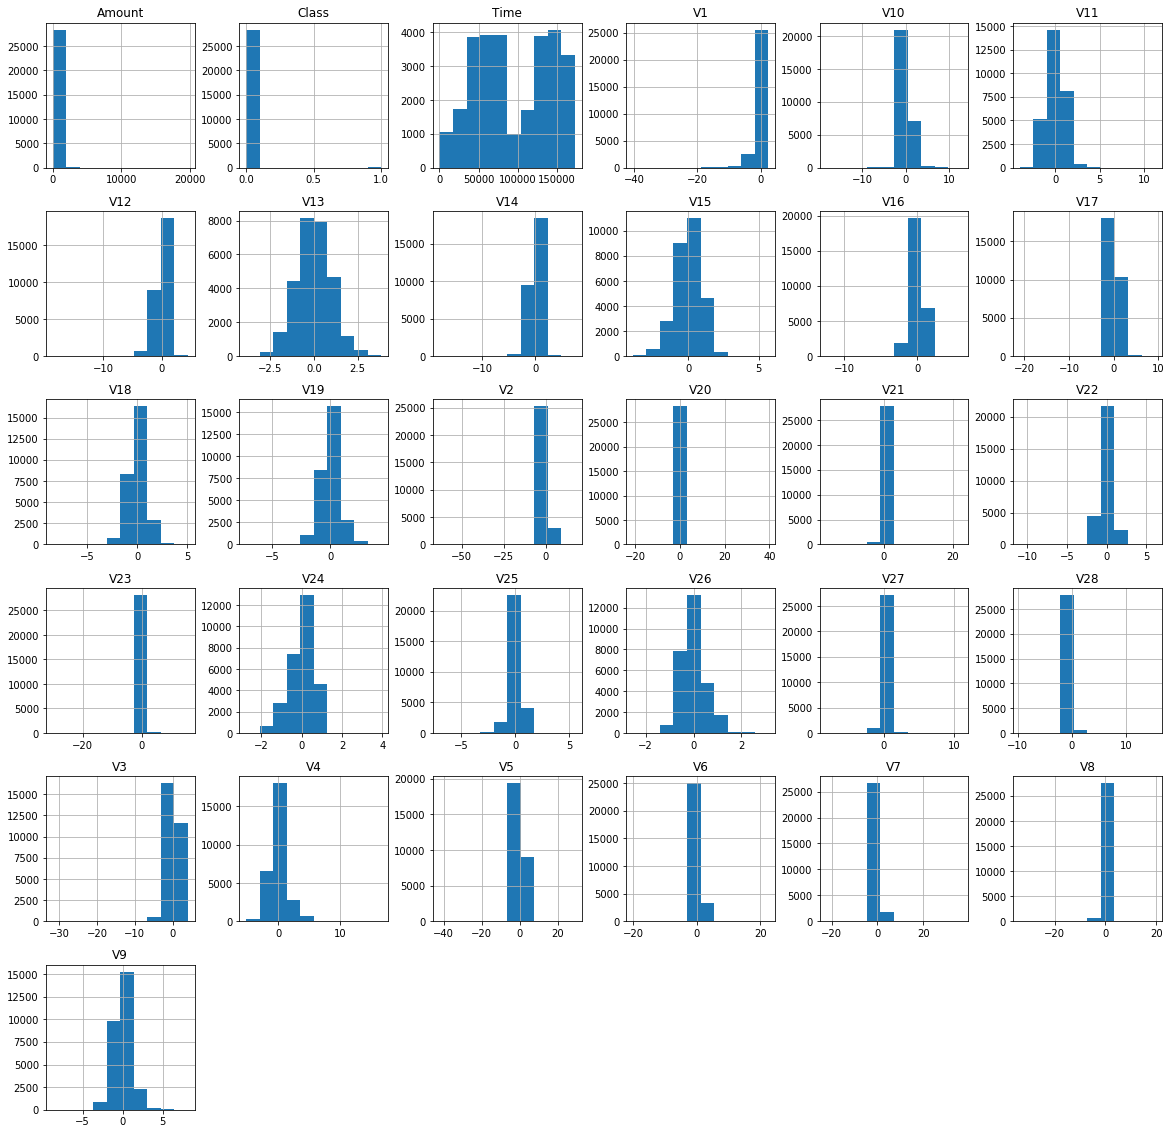

In [14]:
# keep exploring the dataset
data.hist(figsize = (20,20))
plt.show()

In [49]:
#number of valid and invalid cases
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlier_fraction = len(fraud) / float(len(valid))
print(outlier_fraction)

print("Fraud Cases: {}".format(len(fraud)))
print("Valid Cases: {}".format(len(valid)))

0.0016999425536654278
Fraud Cases: 290
Valid Cases: 170594


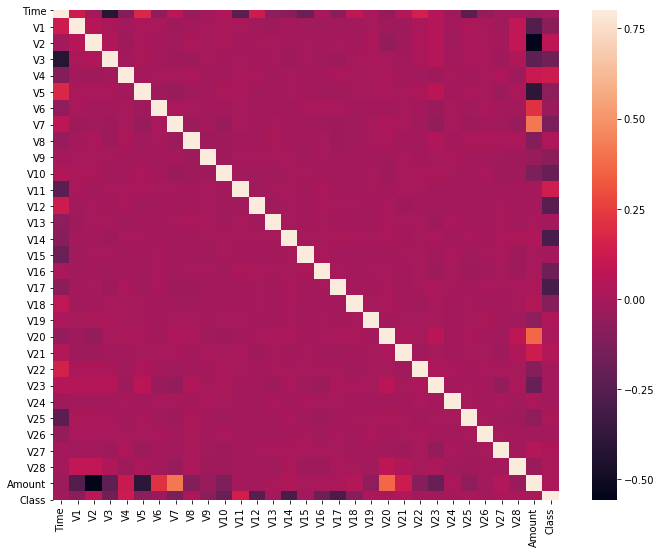

In [17]:
# correlation matrix
correlat = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(correlat, vmax=0.8, square = True)
plt.show()

In [50]:
# get all the columns from the dataframe
columns = data.columns.tolist()

#filter the columns to remove data we do not match
columns = [c for c in columns if c not in ['Class']]

#store the variable we'll be predicting on 
target = 'Class'

X = data[columns]
Y = data[target]

#print the shape
print(X.shape)
print(Y.shape)

(170884, 30)
(170884,)


In [51]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#define a random state
state =1

#define the outlier detection methods
classfiers = {
    "Isolation Forest": IsolationForest(max_samples = len(X),
                                        contamination = outlier_fraction,
                                        random_state = state),
    "Local Outlier Factor": LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction)
}

In [52]:
#fit the model
n_outliers = len(fraud)

for i , (clf_name, clf) in enumerate(classfiers.items()):
    
    # fit the data and tag outliers
    
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_predictions = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    #reshape the prediction
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1]= 1
    
    
    n_errors = (y_pred != Y).sum()
    
    #run the classification matrix
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 393
0.9977001942838417
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170594
           1       0.32      0.32      0.32       290

   micro avg       1.00      1.00      1.00    170884
   macro avg       0.66      0.66      0.66    170884
weighted avg       1.00      1.00      1.00    170884

Local Outlier Factor: 561
0.9967170712296061
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170594
           1       0.03      0.03      0.03       290

   micro avg       1.00      1.00      1.00    170884
   macro avg       0.52      0.52      0.52    170884
weighted avg       1.00      1.00      1.00    170884

